# **Computing for Economics Project 2**

NAME - PRATEEK GUPTA

ENROLMENT NO - S243DEC28

COURSE - MA ECONOMICS

In [3]:
import os
import numpy as np
import pandas as pd
import pyarrow
import duckdb
import openpyxl
import fastparquet
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
%load_ext sql
con = duckdb.connect()
%sql duckdb:///mydb.duckdb

# CLEANING , COMPRESSING AND MERGING

In [3]:
des_mci = con.execute("""
    DESCRIBE SELECT * 
    FROM read_parquet('E:\\hi_mci_parquet\\mci_parquet\\mci_21.parquet')
""")

In [4]:
duckdb.read_parquet("E:\\hi_mci_parquet\\mci_parquet\\mci_21.parquet")

┌──────────┬─────────────────┬─────────┬───────────┬─────────────┬──────────────┬─────────────┬────────────┬──────────┬─────────────────┬───────────────────────┬────────────────────┬─────────────┬─────────────┬───────────────────────┬─────────────────────────┬─────────────────────┬───────────────────────┬──────────┬──────────────────────┬────────────────────┬─────────────────────────────────────┬───────────────────────────────────────┬─────────────────────────────────┬────────────────────┬────────────────────┬─────────┬─────────────┬────────────┬────────────────┬────────────────────────┬──────────────────────────┬──────────────────────────────────┬──────────────┬───────────────────┬───────────────────────┬────────────┬──────────────────┬───────────────────────┬───────────────────────────┬───────────────────────────┬───────────────────────────────┬──────────────┬──────────────────┬────────────────────────────┬─────────────────────────┬─────────────────────────────┬──────────────────────

In [14]:
mci_21 = duckdb.sql("""
    SELECT HH_ID,
           STATE,
           HR,
           DISTRICT,
           REGION_TYPE,
           MONTH_SLOT,
           RESPONSE_STATUS,
           TOT_EXP
    FROM read_parquet('E:/hi_mci_parquet/mci_parquet/*.parquet', union_by_name=True)
""")

In [15]:
mci_21= mci_21.df()

In [16]:
mci_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060828 entries, 0 to 21060827
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   HH_ID            int64 
 1   STATE            object
 2   HR               object
 3   DISTRICT         object
 4   REGION_TYPE      object
 5   MONTH_SLOT       object
 6   RESPONSE_STATUS  object
 7   TOT_EXP          int64 
dtypes: int64(2), object(6)
memory usage: 1.3+ GB


In [17]:
type(mci_21)

pandas.core.frame.DataFrame

In [18]:
mci_21.columns

Index(['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'MONTH_SLOT',
       'RESPONSE_STATUS', 'TOT_EXP'],
      dtype='object')

In [19]:
mci_21['MONTH_SLOT'].describe()

count     21060828
unique         127
top       Mar 2024
freq        198391
Name: MONTH_SLOT, dtype: object

In [20]:
mci_21

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,RESPONSE_STATUS,TOT_EXP
0,77051739,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,15412
1,61287374,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,9925
2,34049553,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,6730
3,92526123,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,11452
4,61508707,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,7012
...,...,...,...,...,...,...,...,...
21060823,18693357,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,30586
21060824,82768393,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,13826
21060825,18077972,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,17124
21060826,35087702,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,26212


In [21]:
mci_21[["month", "year"]] = mci_21["MONTH_SLOT"].str.split(" ", expand=True)

In [22]:
mci_21

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,RESPONSE_STATUS,TOT_EXP,month,year
0,77051739,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,15412,May,2014
1,61287374,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,9925,May,2014
2,34049553,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,6730,May,2014
3,92526123,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,11452,May,2014
4,61508707,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,7012,May,2014
...,...,...,...,...,...,...,...,...,...,...
21060823,18693357,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,30586,Jul,2024
21060824,82768393,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,13826,Jul,2024
21060825,18077972,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,17124,Jul,2024
21060826,35087702,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,26212,Jul,2024


In [23]:
mci_21['year']=mci_21['year'].astype('Int64')

In [24]:
mci_21['year'].value_counts()

year
2022    2144124
2023    2141815
2021    2136060
2020    2092860
2019    2092680
2018    2058428
2017    1941041
2015    1887065
2016    1874191
2014    1509192
2024    1183372
Name: count, dtype: Int64

In [25]:
mci_21.to_parquet("mci_21.parquet" ,engine="fastparquet")

In [26]:
mci_compress = con.execute("""
    COPY(
        SELECT * FROM read_parquet ('mci_21.parquet')
    ) TO 'mci_compressed.parquet' (FORMAT 'parquet', COMPRESSION 'zstd')
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [3]:
des_hi = con.execute("""
    DESCRIBE SELECT * 
    FROM read_parquet('E:\\hi_mci_parquet\\hi_parquet\\hi23.parquet')
""")

In [4]:
duckdb.read_parquet("E:\\hi_mci_parquet\\hi_parquet\\hi23.parquet")

┌──────────┬─────────────────┬─────────┬───────────┬─────────────┬──────────────┬─────────────┬────────────┬─────────────────┬─────────────────────────┬────────────────┬────────────────────┬─────────────┬──────────────────────────┬─────────────────────────┬────────────────────────┬───────────────────────┬────────────────────┬────────────────────────────────┬──────────────────────────────┬─────────────────────────────────────┬─────────────────────────────────────┬─────────────────────────────────┬─────────────────┬────────────┬──────────────┬────────────────────────────────────────┬──────────────────────────────────┬────────────────────────────────────┬─────────────────────────────────────┬─────────────────────────────────────┬────────────────────────────────────────────┬──────────────────────────────────────┬───────────────────────────────┬──────────────────────────────────────────┬────────────────────────────────────────────┬───────────────────────────────────────────────┬────────────

In [5]:
hi_23 = duckdb.sql("""
    SELECT HH_ID,
           STATE,
           HR,
           DISTRICT,
           REGION_TYPE,
           MONTH_SLOT,
           RESPONSE_STATUS,
           TOTAL_INCOME
    FROM read_parquet('E:\\hi_mci_parquet\\hi_parquet\\*.parquet', union_by_name=True)
""")

In [6]:
hi_23= hi_23.df()

In [7]:
hi_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20882023 entries, 0 to 20882022
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   HH_ID            float64
 1   STATE            object 
 2   HR               object 
 3   DISTRICT         object 
 4   REGION_TYPE      object 
 5   MONTH_SLOT       object 
 6   RESPONSE_STATUS  object 
 7   TOTAL_INCOME     float64
dtypes: float64(2), object(6)
memory usage: 1.2+ GB


In [8]:
type(hi_23)

pandas.core.frame.DataFrame

In [9]:
hi_23.columns

Index(['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'MONTH_SLOT',
       'RESPONSE_STATUS', 'TOTAL_INCOME'],
      dtype='object')

In [10]:
hi_23

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,RESPONSE_STATUS,TOTAL_INCOME
0,77051739.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,19000.0
1,61287374.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,22000.0
2,34049553.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,5600.0
3,92526123.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,25100.0
4,61508707.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,7700.0
...,...,...,...,...,...,...,...,...
20882018,18693357.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,62616.0
20882019,82768393.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,19700.0
20882020,18077972.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,46970.0
20882021,35087702.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,67325.0


In [11]:
hi_23['MONTH_SLOT'].describe()

count     20882023
unique         127
top       Mar 2024
freq        198391
Name: MONTH_SLOT, dtype: object

In [12]:
hi_23[["month", "year"]] = hi_23["MONTH_SLOT"].str.split(" ", expand=True)

In [13]:
hi_23

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,RESPONSE_STATUS,TOTAL_INCOME,month,year
0,77051739.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,19000.0,May,2014
1,61287374.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,22000.0,May,2014
2,34049553.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,5600.0,May,2014
3,92526123.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,25100.0,May,2014
4,61508707.0,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,7700.0,May,2014
...,...,...,...,...,...,...,...,...,...,...
20882018,18693357.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,62616.0,Jul,2024
20882019,82768393.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,19700.0,Jul,2024
20882020,18077972.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,46970.0,Jul,2024
20882021,35087702.0,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,67325.0,Jul,2024


In [14]:
hi_23['year']=hi_23['year'].astype('Int64')

In [15]:
hi_23["HH_ID"]= hi_23["HH_ID"].astype("Int64")

In [16]:
hi_23.to_parquet("hi_23.parquet" ,engine="fastparquet")

In [17]:
hi_compress = con.execute("""
    COPY(
        SELECT * FROM read_parquet ('hi_21.parquet')
    ) TO 'hi_compressed.parquet' (FORMAT 'parquet', COMPRESSION 'zstd')
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [10]:
tot_exp = pd.read_parquet("D:\\Ma Python\\mci_compressed.parquet")

In [6]:
tot_inc = pd.read_parquet("D:\\Ma Python\\hi_compressed.parquet")

In [11]:
tot_exp

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,RESPONSE_STATUS,TOT_EXP,month,year
0,77051739,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,15412,May,2014
1,61287374,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,9925,May,2014
2,34049553,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,6730,May,2014
3,92526123,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,11452,May,2014
4,61508707,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,7012,May,2014
...,...,...,...,...,...,...,...,...,...,...
21060823,18693357,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,30586,Jul,2024
21060824,82768393,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,13826,Jul,2024
21060825,18077972,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,17124,Jul,2024
21060826,35087702,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,26212,Jul,2024


In [12]:
tot_inc

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,RESPONSE_STATUS,TOTAL_INCOME,month,year
0,77051739,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,19000.0,May,2014
1,61287374,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,22000.0,May,2014
2,34049553,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,5600.0,May,2014
3,92526123,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,25100.0,May,2014
4,61508707,Jammu & Kashmir,HR 1,Bandipore,RURAL,May 2014,Accepted,7700.0,May,2014
...,...,...,...,...,...,...,...,...,...,...
20882018,18693357,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,62616.0,Jul,2024
20882019,82768393,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,19700.0,Jul,2024
20882020,18077972,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,46970.0,Jul,2024
20882021,35087702,Meghalaya,HR 110,East Khasi Hills,RURAL,Jul 2024,Accepted,67325.0,Jul,2024


In [13]:
tot_exp_agg = tot_exp.groupby(["HH_ID" , 'year' , 'STATE' ,'REGION_TYPE'], as_index=False)['TOT_EXP'].sum()

In [14]:
tot_exp_agg

,HH_ID,year,STATE,REGION_TYPE,TOT_EXP
0,10000061,2021,Andhra Pradesh,URBAN,-1188
1,10000061,2022,Andhra Pradesh,URBAN,-1188
2,10000061,2023,Andhra Pradesh,URBAN,67563
3,10000061,2024,Andhra Pradesh,URBAN,97653
4,10000111,2014,Uttar Pradesh,URBAN,183647
...,...,...,...,...,...
1958488,99998894,2021,Chandigarh,URBAN,265940
1958489,99998894,2022,Chandigarh,URBAN,400680
1958490,99998894,2023,Chandigarh,URBAN,249302
1958491,99998894,2024,Chandigarh,URBAN,89595


In [15]:
tot_inc_agg = tot_inc.groupby(["HH_ID" , 'year' , 'STATE' ,'REGION_TYPE'], as_index=False)['TOTAL_INCOME'].sum()

In [16]:
tot_inc_agg

,HH_ID,year,STATE,REGION_TYPE,TOTAL_INCOME
0,10000061,2021,Andhra Pradesh,URBAN,-1089.0
1,10000061,2022,Andhra Pradesh,URBAN,-1188.0
2,10000061,2023,Andhra Pradesh,URBAN,157278.0
3,10000061,2024,Andhra Pradesh,URBAN,185045.0
4,10000111,2014,Uttar Pradesh,URBAN,252500.0
...,...,...,...,...,...
1958488,99998894,2021,Chandigarh,URBAN,700000.0
1958489,99998894,2022,Chandigarh,URBAN,791000.0
1958490,99998894,2023,Chandigarh,URBAN,579604.0
1958491,99998894,2024,Chandigarh,URBAN,191802.0


In [17]:
total_inc_exp = pd.merge(tot_inc_agg , tot_exp_agg , how='inner' , on= ['HH_ID', 'year'])

In [18]:
total_inc_exp

,HH_ID,year,STATE_x,REGION_TYPE_x,TOTAL_INCOME,STATE_y,REGION_TYPE_y,TOT_EXP
0,10000061,2021,Andhra Pradesh,URBAN,-1089.0,Andhra Pradesh,URBAN,-1188
1,10000061,2022,Andhra Pradesh,URBAN,-1188.0,Andhra Pradesh,URBAN,-1188
2,10000061,2023,Andhra Pradesh,URBAN,157278.0,Andhra Pradesh,URBAN,67563
3,10000061,2024,Andhra Pradesh,URBAN,185045.0,Andhra Pradesh,URBAN,97653
4,10000111,2014,Uttar Pradesh,URBAN,252500.0,Uttar Pradesh,URBAN,183647
...,...,...,...,...,...,...,...,...
1958488,99998894,2021,Chandigarh,URBAN,700000.0,Chandigarh,URBAN,265940
1958489,99998894,2022,Chandigarh,URBAN,791000.0,Chandigarh,URBAN,400680
1958490,99998894,2023,Chandigarh,URBAN,579604.0,Chandigarh,URBAN,249302
1958491,99998894,2024,Chandigarh,URBAN,191802.0,Chandigarh,URBAN,89595


# MAKING ENGEL CURVES AND TABLES

ENGEL CURVE

In [19]:
total_inc_exp['income_bin'] = pd.qcut(total_inc_exp['TOTAL_INCOME'], q=20, duplicates='drop')
engel_data = total_inc_exp.groupby('income_bin').agg({
    'TOTAL_INCOME': 'mean',
    'TOT_EXP': 'mean'
}).reset_index()

C:\Users\prate_onq7uva\AppData\Local\Temp\ipykernel_31468\4214460292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engel_data = total_inc_exp.groupby('income_bin').agg({


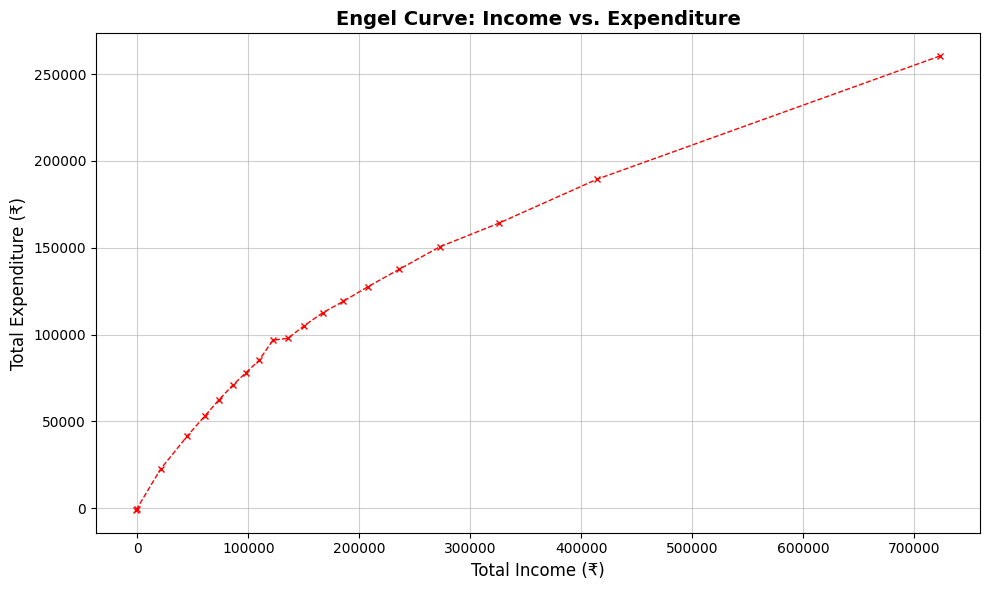

In [20]:
plt.figure(figsize=(10,6))
plt.plot(engel_data['TOTAL_INCOME'], engel_data['TOT_EXP'],
         marker='x', linestyle='--', color='red', linewidth=1, markersize=5)
plt.xlabel('Total Income (₹)', fontsize=12)
plt.ylabel('Total Expenditure (₹)', fontsize=12)
plt.title('Engel Curve: Income vs. Expenditure', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.savefig('engel_curve.png' , dpi=300 )
plt.show()

ENGEL CURVE OVER TIME

In [21]:
grouped = total_inc_exp.groupby(['year', 'income_bin']).agg(
    avg_income=('TOTAL_INCOME', 'mean'),
    avg_exp=('TOT_EXP', 'mean')
).reset_index()

C:\Users\prate_onq7uva\AppData\Local\Temp\ipykernel_31468\2717677382.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = total_inc_exp.groupby(['year', 'income_bin']).agg(


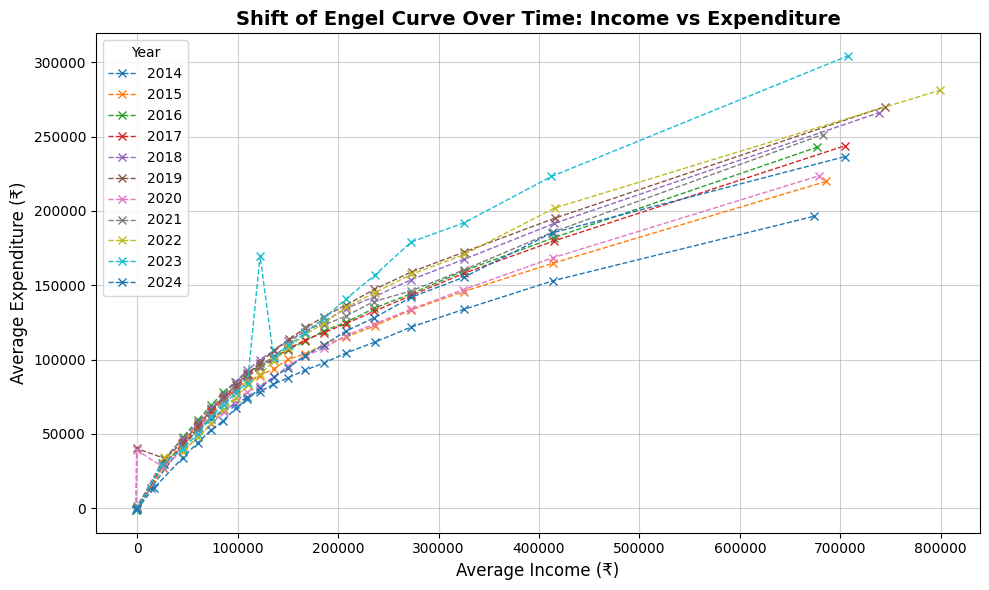

In [22]:
plt.figure(figsize=(10, 6))
for year in sorted(grouped['year'].unique()):
    data_year = grouped[grouped['year'] == year]
    plt.plot(data_year['avg_income'], data_year['avg_exp'], marker='x',linewidth= 1, linestyle='--', label=str(year))
plt.title('Shift of Engel Curve Over Time: Income vs Expenditure', fontsize=14, fontweight='bold')
plt.xlabel('Average Income (₹)', fontsize=12)
plt.ylabel('Average Expenditure (₹)', fontsize=12)
plt.legend(title='Year')
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.savefig('engel_curve_over_time.png' , dpi=300 )
plt.show()

AVERAGE INCOME AND EXPENDITURE

In [23]:
table1 = total_inc_exp.groupby("year")[["TOTAL_INCOME", "TOT_EXP"]].mean().reset_index()
print(table1)


    year   TOTAL_INCOME        TOT_EXP
0   2014  123184.320117   68757.818236
1   2015  148681.065803   87628.730617
2   2016  152198.747037   96551.596149
3   2017  160754.976466   94297.161918
4   2018  229073.464850  127291.214589
5   2019  244687.210751  134693.296517
6   2020  151086.623864   82158.887882
7   2021  172685.592320  101465.031677
8   2022  215029.497910  117590.794126
9   2023  199583.664546  124471.790504
10  2024   97445.151953   54072.791250


AVERAGE BUDGET SHARE BY REGION TYPE

In [24]:
total_inc_exp_filtered = total_inc_exp[total_inc_exp["TOTAL_INCOME"] > 0].copy()
total_inc_exp_filtered["budget_share"] = total_inc_exp_filtered["TOT_EXP"] / total_inc_exp_filtered["TOTAL_INCOME"]

table2 = total_inc_exp_filtered.groupby("REGION_TYPE_x")["budget_share"].mean().reset_index()
print(table2)

  REGION_TYPE_x  budget_share
0         RURAL      0.971277
1         URBAN      0.700694


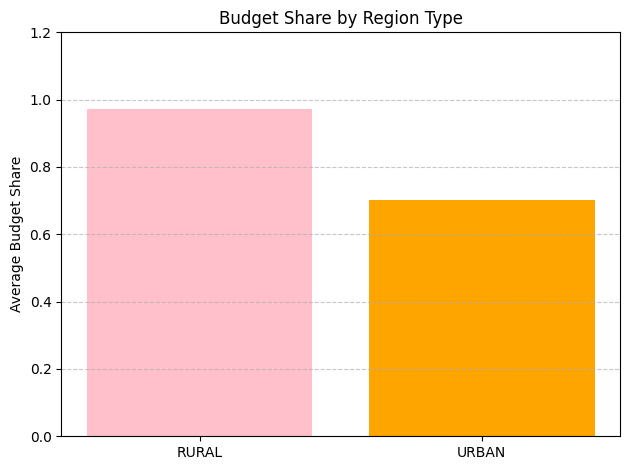

In [25]:
plt.bar(table2['REGION_TYPE_x'], table2['budget_share'], color=['pink', 'orange'])
plt.ylabel('Average Budget Share')
plt.title('Budget Share by Region Type')
plt.ylim(0, 1.2)  # Scale from 0 to slightly above 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('budget share by region.png' , dpi=300 )
plt.show()

SUMMARY STATISTICS BY INCOME QUARTILES

In [26]:
total_inc_exp_filtered["income_quartile"] = pd.qcut(total_inc_exp_filtered["TOTAL_INCOME"], 4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"])
table3 = total_inc_exp_filtered.groupby("income_quartile")[["TOTAL_INCOME", "TOT_EXP", "budget_share"]].mean().reset_index()
print(table3)


  income_quartile   TOTAL_INCOME        TOT_EXP  budget_share
0        Q1 (Low)   57730.117452   50754.901243      1.255992
1              Q2  115307.157118   88704.684530      0.772848
2              Q3  185214.295191  119018.445731      0.647662
3       Q4 (High)  415299.795041  186163.723827      0.484426


C:\Users\prate_onq7uva\AppData\Local\Temp\ipykernel_31468\2487632875.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table3 = total_inc_exp_filtered.groupby("income_quartile")[["TOTAL_INCOME", "TOT_EXP", "budget_share"]].mean().reset_index()


In [ ]:
X = total_inc_exp['TOTAL_INCOME']
y = total_inc_exp['TOT_EXP']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                TOT_EXP   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1630.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        15:06:31   Log-Likelihood:            -2.8104e+07
No. Observations:             1958493   AIC:                         5.621e+07
Df Residuals:                 1958491   BIC:                         5.621e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.617e+04    300.647    319.876   

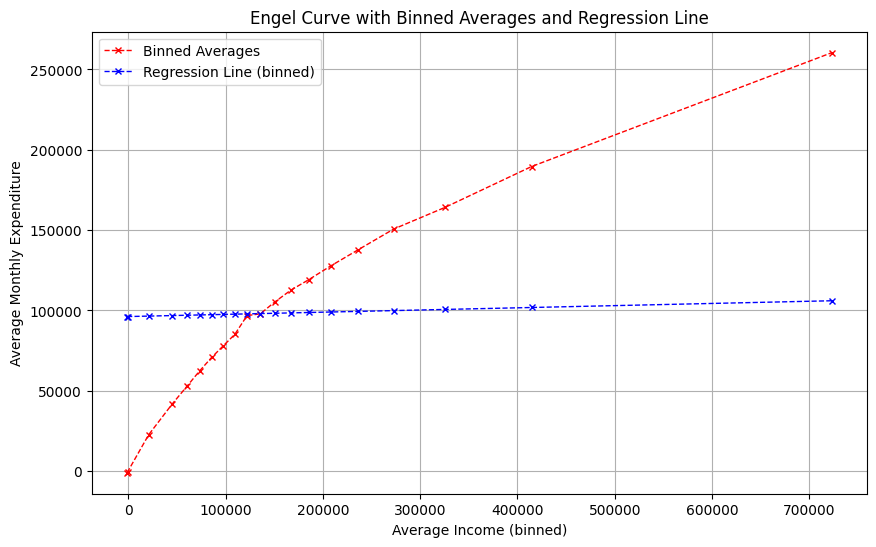

In [29]:
X_binned = sm.add_constant(engel_data['TOTAL_INCOME']) 
engel_data['prediction'] = model.predict(X_binned)
plt.figure(figsize=(10,6))
plt.plot(engel_data['TOTAL_INCOME'], engel_data['TOT_EXP'], label='Binned Averages'
         ,marker='x', linestyle='--', color='red', linewidth=1, markersize=5)
plt.plot(engel_data['TOTAL_INCOME'], engel_data['prediction'], label='Regression Line (binned)'
         ,marker='x', linestyle='--', color='blue', linewidth=1, markersize=5)
plt.xlabel("Average Income (binned)")
plt.ylabel("Average Monthly Expenditure")
plt.title("Engel Curve with Binned Averages and Regression Line")
plt.legend()
plt.grid(True)
plt.savefig('regression.png' , dpi=300 )
plt.show()